In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize

In [26]:
# Database connection
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'useducation'

# Establish connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

# Create DF
edu_df = pd.read_sql_query('select * from useducation', con=engine)

# Disconnect
engine.dispose()

In [27]:
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [28]:
# Make copy of dataframe
edu2 = edu_df.copy()

# Remove columns with large amount of missing values
edu2.drop(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis=1, inplace=True)

In [34]:
edu2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 21 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

In [31]:
# List of columns
columns = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
           'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G',
           'GRADES_ALL_G']

# Fill variable missing values with variable mean
for column in columns:
    edu2[column].fillna(edu2[column].mean(), inplace=True)

In [35]:
edu2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 21 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

### Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values? 

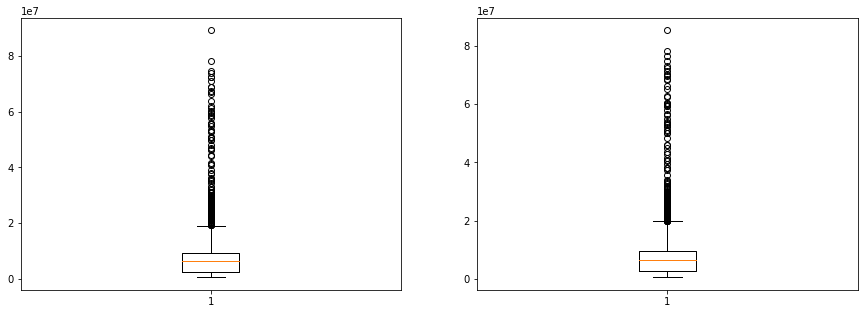

In [39]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(edu2['TOTAL_REVENUE'])
plt.title('Boxplot for Total Revenue')

plt.subplot(1, 2, 2)
plt.boxplot(edu2['TOTAL_EXPENDITURE'])
plt.title('Boxplot for Total Expenditure')
plt.show()

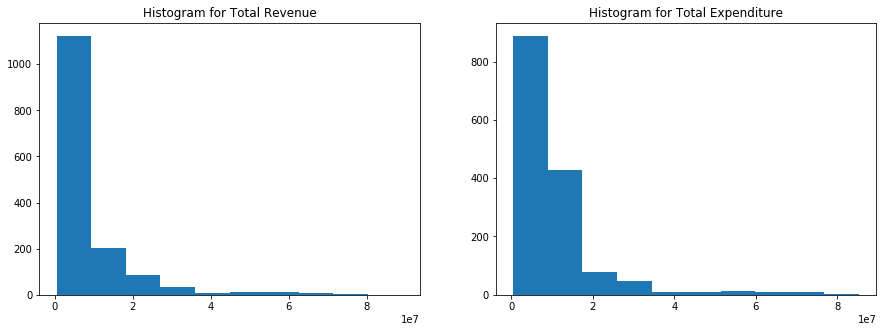

In [40]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.hist(edu2['TOTAL_REVENUE'])
plt.title('Histogram for Total Revenue')

plt.subplot(1, 2, 2)
plt.hist(edu2['TOTAL_EXPENDITURE'])
plt.title('Histogram for Total Expenditure')
plt.show()

As seen above, ```TOTAL_REVENUE``` and ```TOTAL_EXPENDITURE``` have outliers.

### If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them. 

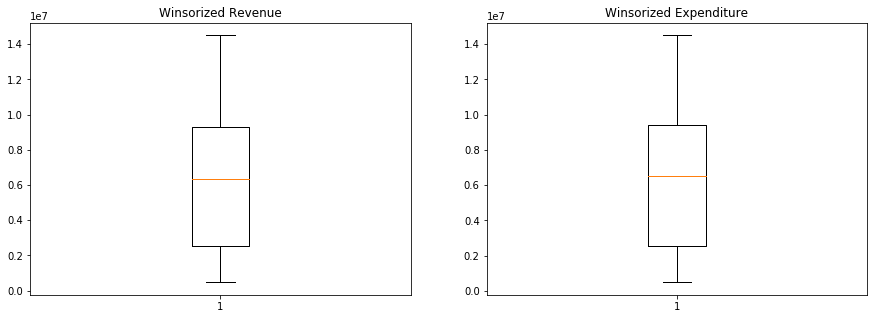

In [47]:
winsorized_revenue = winsorize(edu2['TOTAL_REVENUE'], (0, 0.15))
winsorized_expenditure = winsorize(edu2['TOTAL_EXPENDITURE'], (0, 0.15))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(winsorized_revenue)
plt.title('Winsorized Revenue')

plt.subplot(1, 2, 2)
plt.boxplot(winsorized_expenditure)
plt.title('Winsorized Expenditure')
plt.show()

### Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable. 

In [50]:
edu2['REV_EXP_DIFF'] = edu2['TOTAL_REVENUE'] - edu2['TOTAL_EXPENDITURE']

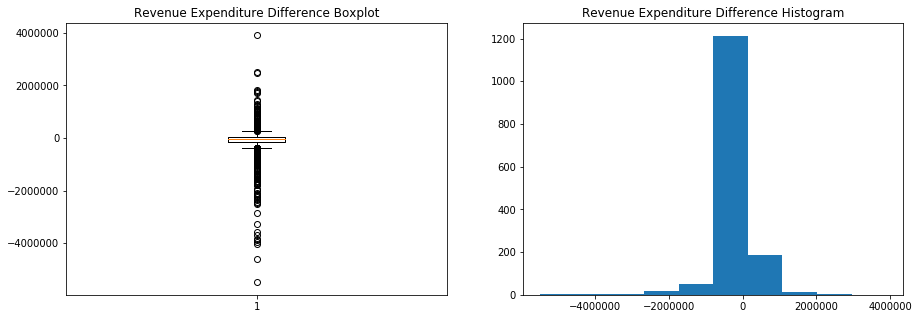

In [51]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(edu2['REV_EXP_DIFF'])
plt.title('Revenue Expenditure Difference Boxplot')

plt.subplot(1, 2, 2)
plt.hist(edu2['REV_EXP_DIFF'])
plt.title('Revenue Expenditure Difference Histogram')
plt.show()

In [63]:
winsorized_diff = winsorize(edu2['REV_EXP_DIFF'], (0.11, 0.10))

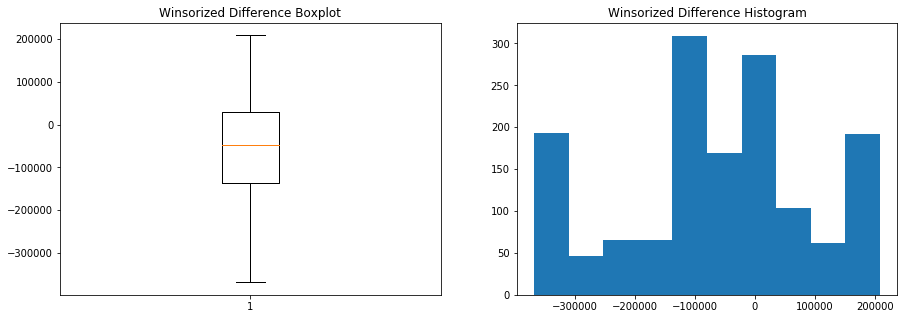

In [64]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(winsorized_diff)
plt.title('Winsorized Difference Boxplot')

plt.subplot(1, 2, 2)
plt.hist(winsorized_diff)
plt.title('Winsorized Difference Histogram')
plt.show()

### Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them. 

In [65]:
rev_exp_winsorized = winsorized_revenue - winsorized_expenditure

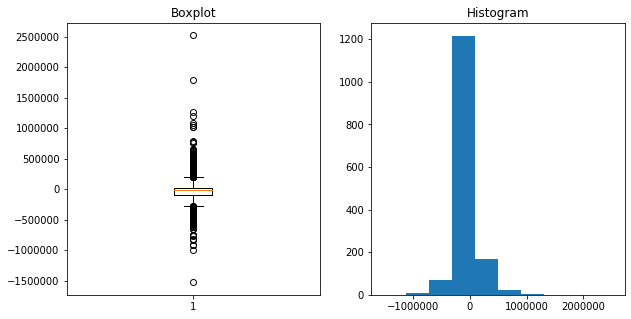

In [70]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(rev_exp_winsorized)
plt.title('Boxplot')

plt.subplot(1, 2, 2)
plt.hist(rev_exp_winsorized)
plt.title('Histogram')
plt.show()

C:\Users\paperspace\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\Users\paperspace\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


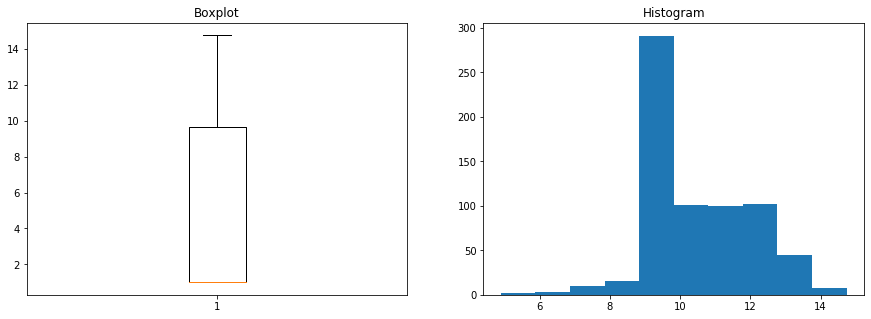

In [72]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(np.log(rev_exp_winsorized))
plt.title('Boxplot')

plt.subplot(1, 2, 2)
plt.hist(np.log(rev_exp_winsorized))
plt.title('Histogram')
plt.show()

### Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences? 

In [85]:
pd.DataFrame({'3rd Question': winsorized_diff, '4th Question': rev_exp_winsorized}).describe()

,3rd Question,4th Question
count,1492.000000,1.492000e+03
mean,-63528.097288,-2.903922e+04
std,167072.064969,2.126468e+05
min,-368853.000000,-1.531644e+06
25%,-136007.000000,-1.045990e+05
50%,-48493.500000,-1.062250e+04
75%,29654.250000,1.505075e+04
max,208528.000000,2.520706e+06


The basic descriptive statistics for the budget variable in the 3rd question and the basic descriptive statistics for the budget variable in the 4th question differ substantially.

### If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question? 

I think the method in the 3rd question is more appropriate in dealing with the outliers since the descriptive statistics seem to be more in line with a budget deficit variable.